# **TikTok Project**
**The Nuts and bolts of machine learning**

Recall that you are a data professional at TikTok. Your supervisor was impressed with the work you have done and has requested that you build a machine learning model that can be used to determine whether a video contains a claim or whether it offers an opinion. With a successful prediction model, TikTok can reduce the backlog of user reports and prioritize them more efficiently.

A notebook was structured and prepared to help you in this project. A notebook was structured and prepared to help you in this project. Please complete the following questions.

# **Classifying videos using machine learning**

In this activity, you will practice using machine learning techniques to predict on a binary outcome variable.
<br/>

**The purpose** of this model is to increase response time and system efficiency by automating the initial stages of the claims process.

**The goal** of this model is to predict whether a TikTok video presents a "claim" or presents an "opinion".
<br/>

*This activity has three parts:*

**Part 1:** Ethical considerations
* Consider the ethical implications of the request

* Should the objective of the model be adjusted?

**Part 2:** Feature engineering

* Perform feature selection, extraction, and transformation to prepare the data for modeling

**Part 3:** Modeling

* Build the models, evaluate them, and advise on next steps

Follow the instructions and answer the questions below to complete the activity. Then, you will complete an Executive Summary using the questions listed on the PACE Strategy Document.

Be sure to complete this activity before moving on. The next course item will provide you with a completed exemplar to compare to your own work.



# **Classify videos using machine learning**

<img src="images/Pace.png" width="100" height="100" align=left>

# **PACE stages**


Throughout these project notebooks, you'll see references to the problem-solving framework PACE. The following notebook components are labeled with the respective PACE stage: Plan, Analyze, Construct, and Execute.

<img src="images/Plan.png" width="100" height="100" align=left>


## **PACE: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following questions:


1. What are you being asked to do? 

In this case, TikTok aims to identify videos violating their terms of service more efficiently by using a machine learning model, where the model needs to distinguish between claims and opinions.

Opinions will be less likely to undergo human review
Claims will be prioritized based on the number of reports. 

2. What metric should I use to evaluate success of my business/organizational objective?

Our target value will be `claim_status`, a binary feature that indiscates if a video is a claim or opinion. (since we are working with a Binary, the model to use will be classification)


3. What are the ethical implications of the model? What are the consequences of your model making errors?

We are prioritizing false positives over false negatives in this case:
The worst consequence of misclassifying an opinion as a claim will result in a human review, but misclassifying a claim as an opinion could lead to a terms-of-service violation. 

4. How would you proceed?

There are about 20,000 videos. after pre-processing we need to:

- We separate our data into Train/test (60% train,  20% validate, and 20% test)
- Training and model optimization
- Selection of model
- Evaluation 


### **Task 1. Imports and data loading**

Start by importing packages needed to build machine learning models to achieve the goal of this project.

In [1]:
# Import packages for data manipulation
import pandas as pd
import numpy as np

# Import packages for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import packages for data preprocessing
from sklearn.feature_extraction.text import CountVectorizer

# Import packages for data modeling
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, precision_score, \
recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance


Now load the data from the provided csv file into a dataframe.

**Note:** As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# Load dataset into dataframe
data = pd.read_csv("tiktok_dataset.csv")

<img src="images/Analyze.png" width="100" height="100" align=left>

## **PACE: Analyze**

Consider the questions in your PACE Strategy Document to reflect on the Analyze stage.

### **Task 2: Examine data, summary info, and descriptive stats**

Inspect the first five rows of the dataframe.

In [3]:
# Display first few rows
data.head(n= 5)


,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


Get the number of rows and columns in the dataset.

In [4]:
# Get number of rows and columns
data.shape


(19382, 12)

Get the data types of the columns.

In [5]:
# Get data types of columns
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


Get basic information about the dataset.

In [6]:
# Get basic information
data.dtypes



#                             int64
claim_status                 object
video_id                      int64
video_duration_sec            int64
video_transcription_text     object
verified_status              object
author_ban_status            object
video_view_count            float64
video_like_count            float64
video_share_count           float64
video_download_count        float64
video_comment_count         float64
dtype: object

Generate basic descriptive statistics about the dataset.

In [7]:
# Generate basic descriptive stats
data.describe()



,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,1.938200e+04,19382.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9691.500000,5.627454e+09,32.421732,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,2.536440e+09,16.229967,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,3.430417e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,5.618664e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,7.843960e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19382.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


Check for and handle missing values.

In [8]:
# Check for missing values
data.isnull().sum()


#                             0
claim_status                298
video_id                      0
video_duration_sec            0
video_transcription_text    298
verified_status               0
author_ban_status             0
video_view_count            298
video_like_count            298
video_share_count           298
video_download_count        298
video_comment_count         298
dtype: int64

Since there are a small amount of null and it is less than 5% of the dataset, we can drop them the observations (1.5%)

In [9]:
# Drop rows with missing values
data = data.dropna(axis= 0) #by rows 


In [10]:
# Display first few rows after handling missing values
data.head()


,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


Check for and handle duplicates.

In [11]:
# Check for duplicates
data.duplicated().sum()


0

There are no duplicate observations in the data.

Check for and handle outliers.

Tree-based models, like decision trees or random forests, are not easily influenced by unusual data points (outliers). This means that you don't have to worry about trying to fill in or remove any data values that are far from the usual pattern of the data.

Check class balance.

In [12]:
# Check class balance
data['claim_status'].value_counts(normalize= True)

claim      0.503458
opinion    0.496542
Name: claim_status, dtype: float64

Approximately 50.3% of the dataset represents videos with claims and 49.7 represents videos with opinions, so the outcome of Claim_status is Balanced.

<img src="images/Construct.png" width="100" height="100" align=left>

## **PACE: Construct**
Consider the questions in your PACE Strategy Document to reflect on the Construct stage.

### **Task 3: Feature engineering**

Extract the length of each `video_transcription_text` and add this as a column to the dataframe, so that it can be used as a potential feature in the model.

In [13]:
# Extract the length of each `video_transcription_text` and add this as a column to the dataframe

                                                                           #applies the function to each row in DF       
data["text_length"] = data["video_transcription_text"].apply(func=lambda text: len(text)) #apply function len to text


Calculate the average text_length for claims and opinions.

In [14]:
# Display first few rows of dataframe after adding new column
data.head()


,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0,97
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0,107
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0,137
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0,131
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0,128


Visualize the distribution of `video_transcription_text` length for claims and opinions.

In [15]:
# Visualize the distribution of `video_transcription_text` length for claims and opinions
# Create two histograms in one plot
data[['claim_status', 'text_length']].groupby('claim_status').mean()


,text_length
claim_status,
claim,95.376978
opinion,82.722562


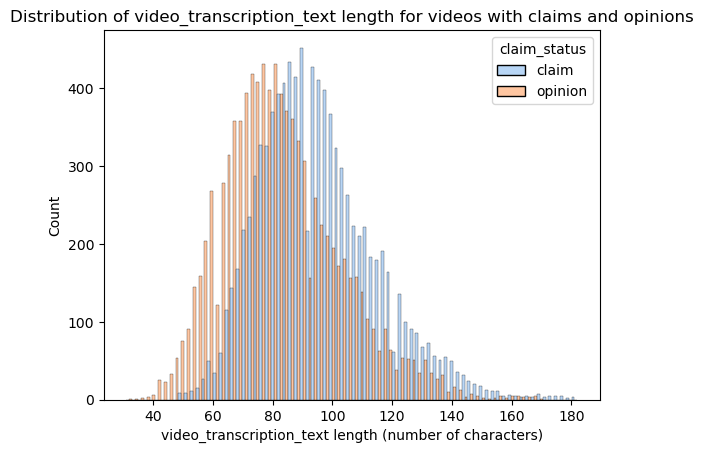

In [16]:
# Visualize the distribution of `video_transcription_text` length for videos posted by verified accounts and videos posted by unverified accounts
# Create two histograms in one plot
sns.histplot(data     =data,
             x        ="text_length",  
             multiple ="dodge",         #stacking bars
             palette  ="pastel", 
             hue      ="claim_status"
             )
plt.title("Seaborn Stacked Histogram")
plt.xlabel("video_transcription_text length (number of characters)")
plt.ylabel("Count")
plt.title("Distribution of video_transcription_text length for videos with claims and opinions")
plt.show()

Both claim and opinion letter count distributions are roughly normal with a slight right skew. Claim videos have about 13 more characters on average, as shown in the previous cell.

Create a heatmap to visualize how correlated variables are. Consider which variables you're interested in examining correlations between.

C:\Users\SnowG\AppData\Local\Temp\ipykernel_17404\1935345735.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data[["video_duration_sec", "claim_status",


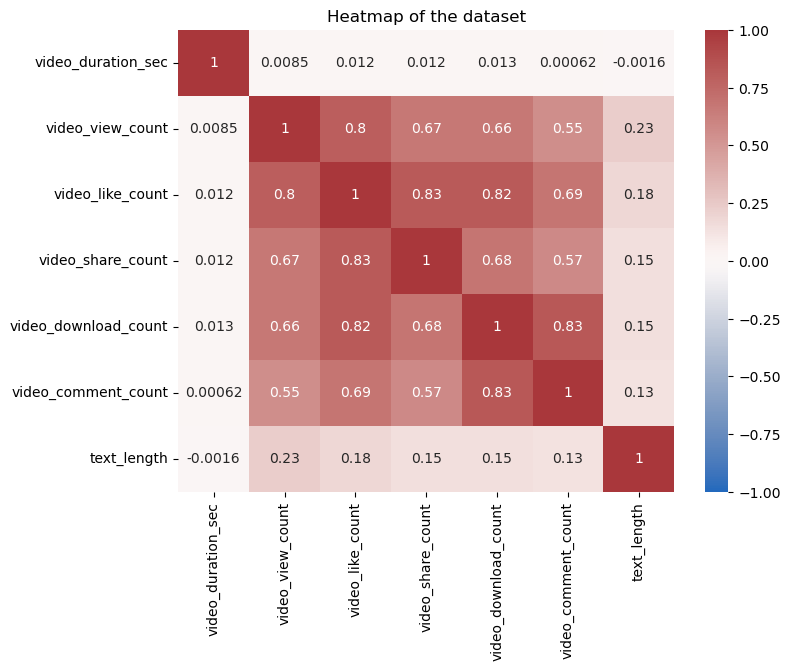

In [17]:
# Create a heatmap to visualize how correlated variables are
plt.figure(figsize=(8, 6))
sns.heatmap(data[["video_duration_sec", "claim_status", 
                            "author_ban_status", "video_view_count",
                            "video_like_count", "video_share_count",
                            "video_download_count", "video_comment_count", 
                            "text_length"]].corr(),
            vmin=-1, vmax=1,
            annot=True, 
            cmap="vlag",)
plt.title("Heatmap of the dataset")
plt.show()

One of the model assumptions for logistic regression is no severe multicollinearity among the features. Take this into consideration as you examine the heatmap and choose which features to proceed with.

**Question:** What variables are shown to be correlated in the heatmap?

`Video_share_count` and `Video_download_count` are two features that are the most correlated (0.68 Corr Coefficient), followed by `Video_share_count` and `Video_view_count` (0.67 Corr Coefficient)

Therefore, we removed `Video_share_count` to deal with multicollinearity since logistic regressions performance depends on the assumption of no multicollinearity.

<img src="images/Construct.png" width="100" height="100" align=left>

## **PACE: Construct**
Consider the questions in your PACE Strategy Document to reflect on the Construct stage.

### **Task 3. Feature engineering**

**Feature selection and transformation**

Encode target and catgorical variables.

In [18]:
x = data.copy()

# Drop unnecessary columns
x = x.drop(['#', 'video_id','video_share_count', 'video_transcription_text'], axis=1)

# Encode target variable
x['claim_status'] = x['claim_status'].replace({'opinion': 0, 'claim': 1})

# Dummy encode remaining categorical values
x = pd.get_dummies(x,columns=['verified_status', 'author_ban_status'],
                   drop_first=True)
x.head()


,claim_status,video_duration_sec,video_view_count,video_like_count,video_download_count,video_comment_count,text_length,verified_status_verified,author_ban_status_banned,author_ban_status_under review
0,1,59,343296.0,19425.0,1.0,0.0,97,0,0,1
1,1,32,140877.0,77355.0,1161.0,684.0,107,0,0,0
2,1,31,902185.0,97690.0,833.0,329.0,137,0,0,0
3,1,25,437506.0,239954.0,1234.0,584.0,131,0,0,0
4,1,19,56167.0,34987.0,547.0,152.0,128,0,0,0


### **Task 4. Split the data**


Assign target variable.

In [19]:
y = x['claim_status'] 

# removing Y from the X variables
x = x.drop(['claim_status'], axis= 1);


#### **Task 5: Create train/validate/test sets**

Split data into training and testing sets, 80/20.

In [20]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.20, random_state=42)


Split the training set into training and validation sets, 75/25, to result in a final ratio of 60/20/20 for train/validate/test sets.

In [21]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=42)

Confirm that the dimensions of the training, validation, and testing sets are in alignment.

In [22]:

x_train.shape, x_val.shape, x_test.shape, y_train.shape, y_val.shape, y_test.shape


((11450, 9), (3817, 9), (3817, 9), (11450,), (3817,), (3817,))

### **Task 6. Build models**


### **Build a random forest model**

Fit a random forest model to the training set. Use cross-validation to tune the hyperparameters and select the model that performs best on recall.

In [23]:
# Instantiate the random forest classifier
rf = RandomForestClassifier(random_state=42)

# Create a dictionary of hyperparameters to tune
cv_params = {'max_depth': [5, 7, None],
             'max_features': [0.3, 0.6],
             'max_samples': [0.7],
             'min_samples_leaf': [1,2],
             'min_samples_split': [2,3],
             'n_estimators': [50,100,200],
             }

# Define a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1'}

# Instantiate the GridSearchCV object
rf_cv = GridSearchCV(rf, cv_params, scoring=scoring, cv=5, refit='recall')


In [24]:
%%time
rf_cv.fit(x_train, y_train)

CPU times: total: 1min 47s
Wall time: 4min 59s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [5, 7, None], 'max_features': [0.3, 0.6],
                         'max_samples': [0.7], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3],
                         'n_estimators': [50, 100, 200]},
             refit='recall', scoring={'f1', 'accuracy', 'recall', 'precision'})

In [25]:
# Examine best recall score
rf_cv.best_score_


0.9913766326500252

In [26]:
# Examine best parameters
rf_cv.best_params_


{'max_depth': None,
 'max_features': 0.6,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 50}

**Question:** How well is your model performing? Consider average recall score and precision score.

The model performance is great, almost perfect score of 0.9913 across validation.

### **Build an XGBoost model**

In [27]:
# Instantiate the XGBoost classifier
xgb = XGBClassifier(objective='binary:logistic', random_state=42)

# Create a dictionary of hyperparameters to tune
cv_params = {'max_depth': [4,8,12],
             'min_child_weight': [3, 5],
             'learning_rate': [0.01, 0.1],
             'n_estimators': [300, 500]
             }

# Define a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1'}

# Instantiate the GridSearchCV object
xgb_cv = GridSearchCV(xgb, cv_params, scoring=scoring, cv=5, refit='recall')

In [28]:
%%time
xgb_cv.fit(x_train, y_train)

CPU times: total: 13min 24s
Wall time: 1min 18s


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=42, ...),
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [4, 8, 12],
                         'min_child_weight': [3, 5],
                         'n_estimators': [300, 500]},
             refit='recall', scoring={'f1', 'accuracy', 'recall', 'precision'})

In [29]:
xgb_cv.best_score_

0.9915490464431287

In [30]:
xgb_cv.best_params_

{'learning_rate': 0.1,
 'max_depth': 8,
 'min_child_weight': 5,
 'n_estimators': 300}

**Question:** How well does your model perform? Consider recall score and precision score.

The model performance is great, almost perfect score of 0.9915 across validation.

This is the model with best performance!

<img src="images/Execute.png" width="100" height="100" align=left>

## **PACE: Execute**
Consider the questions in your PACE Strategy Document to reflect on the Execute stage.

### **Task 7. Evaluate model**

Evaluate models against validation criteria.

#### **Random forest**

In [31]:
# Use the random forest "best estimator" model to get predictions on the encoded testing set
y_pred = rf_cv.best_estimator_.predict(x_val)

Display the predictions on the encoded testing set.

In [32]:
# Display the predictions on the encoded testing set
y_pred

array([1, 0, 0, ..., 0, 0, 1], dtype=int64)

Display the true labels of the testing set.

In [33]:
# Display the true labels of the testing set
y_val

1871     1
16574    0
17741    0
17214    0
17821    0
        ..
15929    0
12177    0
18295    0
17339    0
9186     1
Name: claim_status, Length: 3817, dtype: int64

Create a confusion matrix to visualize the results of the classification model.

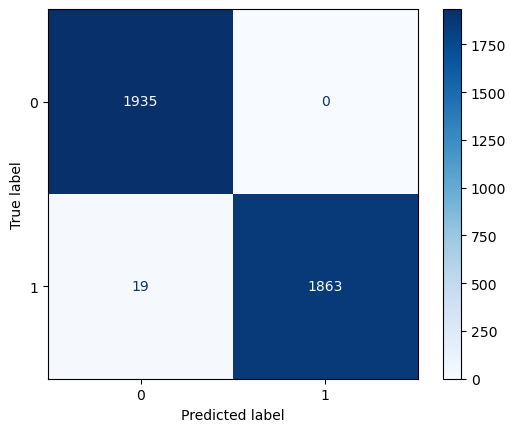

In [34]:
# Create a confusion matrix to visualize the results of the classification model

# Compute values for confusion matrix
log_cm = confusion_matrix(y_val, y_pred)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=None)

# Plot confusion matrix
log_disp.plot(cmap= 'Blues')

# Display plot
plt.show()

Create a classification report that includes precision, recall, f1-score, and accuracy metrics to evaluate the performance of the model.

In [35]:
# Create a classification report
# Create classification report for random forest model
target_labels = ['opinion', 'claim']
print(classification_report(y_val, y_pred, target_names=target_labels))


              precision    recall  f1-score   support

     opinion       0.99      1.00      1.00      1935
       claim       1.00      0.99      0.99      1882

    accuracy                           1.00      3817
   macro avg       1.00      0.99      1.00      3817
weighted avg       1.00      1.00      1.00      3817



**Question:** What does your classification report show? What does the confusion matrix indicate?

The classification report reveals that the random forest model achieved almost flawless scores. Within the confusion matrix, it can be observed that there were 19 instances of misclassifications, evenly split between five false positives and five false negatives.

#### **XGBoost**

In [36]:
#Evaluate XGBoost model
y_pred = xgb_cv.best_estimator_.predict(x_val)

In [37]:
y_pred

array([1, 0, 0, ..., 0, 0, 1])

In [38]:
y_val

1871     1
16574    0
17741    0
17214    0
17821    0
        ..
15929    0
12177    0
18295    0
17339    0
9186     1
Name: claim_status, Length: 3817, dtype: int64

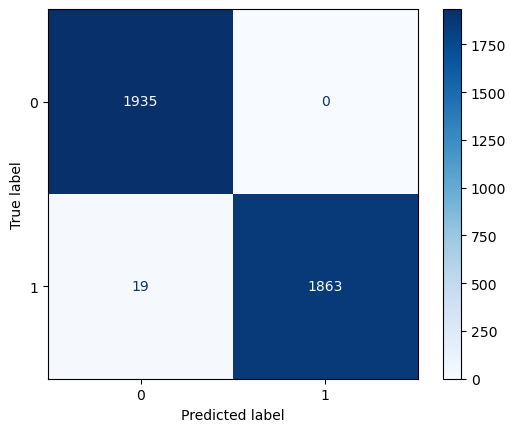

In [39]:
# Create a confusion matrix to visualize the results of the classification model

# Compute values for confusion matrix
log_cm = confusion_matrix(y_val, y_pred)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=None)

# Plot confusion matrix
log_disp.plot(cmap= 'Blues')

# Display plot
plt.show()


In [40]:
# Create a classification report
target_labels = ['opinion', 'claim']
print(classification_report(y_val, y_pred, target_names=target_labels))

              precision    recall  f1-score   support

     opinion       0.99      1.00      1.00      1935
       claim       1.00      0.99      0.99      1882

    accuracy                           1.00      3817
   macro avg       1.00      0.99      1.00      3817
weighted avg       1.00      1.00      1.00      3817



**Question:** Describe your XGBoost model results. How does your XGBoost model compare to your random forest model?

The XGBoost model performed remarkably well, having the highest score and lower misclassification errors. This is our champion model.

### **Use champion model to predict on test data**

Both random forest and XGBoost model architectures resulted in nearly perfect models. Nonetheless, in this case  XGBoost performed a little bit better, so it is the champion model.

Now, use the champion model to predict on the test data.

In [41]:
y_pred = rf_cv.best_estimator_.predict(x_test)


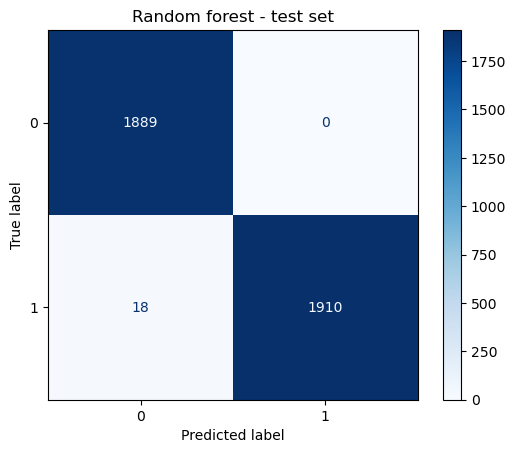

In [42]:
# Compute values for confusion matrix
log_cm = confusion_matrix(y_test, y_pred)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=None)

# Plot confusion matrix
log_disp.plot(cmap= 'Blues')

# Display plot
plt.title('Random forest - test set');
plt.show()


#### **Feature importances of champion model**


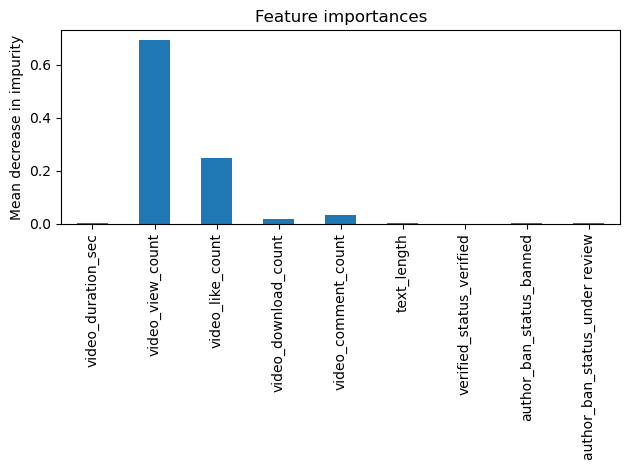

In [43]:
importances = rf_cv.best_estimator_.feature_importances_
rf_importances = pd.Series(importances, index=x_test.columns)

fig, ax = plt.subplots()
rf_importances.plot.bar(ax=ax)
ax.set_title('Feature importances')
ax.set_ylabel('Mean decrease in impurity')
fig.tight_layout()

**Question:** Describe your most predictive features. Were your results surprising?

The variables related to the video's engagement levels proved to be the most significant predictors, which aligns with our prior exploratory data analysis findings.

### **Task 8. Conclusion**

In this step use the results of the models above to formulate a conclusion. Consider the following questions:

1. **Would you recommend using this model? Why or why not?**
Yes, I would recommend deploying the XGBoost model. It demonstrated exceptional performance across all key metrics, particularly recall critical for identifying claim content accurately. With near-perfect validation and test scores, the model can significantly reduce the burden on human reviewers by accurately filtering videos into claims and opinions, supporting TikTok’s goal to improve moderation efficiency and response times.


2. **What was your model doing? Can you explain how it was making predictions?**
The model learned to classify videos based on patterns in engagement metrics (views, likes, downloads) and characteristics of the transcription text. For instance, videos that are more likely to be shared, commented on, or downloaded tend to contain more claims. Text length was also a useful proxy, as claim videos tended to be slightly longer on average.


3. **Are there new features that you can engineer that might improve model performance?**
While performance is already strong, there is potential to further improve and generalize the model by incorporating:

* Natural Language Processing (NLP) features, such as sentiment scores, keyword presence.

* User history data, such as prior flags or posting patterns, to detect repeat offenders. 